# O Gradiente Descendente | S06


# Introdução

Vamos considerar a situação em que deseja-se prever o tempo da sentença (em meses) a partir do número de condenações anteriores. A tabela a seguir oferece um conjunto inicial.

Condenações anteriores ($X$) | Sentenças (em meses) ($Y$)
:---------------------------:|---------------------------
0 | 12
3 | 13
1 | 15
0 | 19
6 | 26
5 | 27
3 | 29
4 | 31
10 | 40
8 | 48

Transformando em listas.

In [75]:
cond_ant = [0, 3, 1, 0, 6, 5, 3, 4, 10, 8]
sentenças = [12, 13, 15, 19, 26, 27, 29, 31, 40, 48]

Colocando o Pandas no jogo.

In [2]:
import pandas as pd
df = pd.DataFrame({"condenações": cond_ant, "sentenças": sentenças})
df.head()

condenações  sentenças
0            0         12
1            3         13
2            1         15
3            0         19
4            6         26

In [3]:
df.corr()

condenações  sentenças
condenações     1.000000   0.848528
sentenças       0.848528   1.000000

Visualizando o modelo em gráficos de dispersão.

In [4]:
import plotly.express as px

fig = px.scatter(
    df, 
    x='condenações', 
    y='sentenças', 
    trendline='ols', 
    trendline_color_override='darkblue',
    opacity=0.8, 
)
fig.update_traces(marker=dict(size=16))
fig.show()

Uma relação linear simples assume que a variação em uma variável contínua independente $X$ corresponde a uma variação linear uma variável contínua dependente $Y$.

$$
Y_{i} = \beta_{0} + \beta_{1}X_{i} + e
$$

A regressão linear simples é utilizada para encontrar os coeficientes $\beta_{0}$ e $\beta_{1}$, que são chamados respectivamente de *intercepto* e *coeficiente de regressão* Com estes coeficientes, podemos construir um modelo preditivo.

$$
\hat{Y} = \beta_{0} + \beta_{1}X
$$

# Preparação do conjunto de treinamento

Em muitos casos, os dados do treinamento para os modelos vem de arquivos de textos, com cada linha representando uma instância. Em nosso contexto, cada linha representa uma pessoa com um determinado número de condenações anteriores a uma sentença determinada.

### Conjunto de dados inicial

In [5]:
amostra = [[0,12],[3,13],[1,15],[0,19],[6,26],[5,27],[3,29],[4,31],[10,40],[8,48]]
amostra

[[0, 12],
 [3, 13],
 [1, 15],
 [0, 19],
 [6, 26],
 [5, 27],
 [3, 29],
 [4, 31],
 [10, 40],
 [8, 48]]

### Inclusão do viés

Note que temos o valor de $X$ e de $Y$, mas não temos um valor para o intercepto em nossa amostra. A inclusão de um valor para o intercepto é importante para dar mais flexibilidade de ajuste ao modelo. Uma maneira de modelar adequadamente a regressão linear, é utilizar a seguinte notação:

$$
\hat{Y} = \beta_{0}X_{0} + \beta_{1}X_{1}
$$

em que $X_{0} = 1$. Assim, devemos acrescentar o $X_{0}$ em nossa amostra. Acrescentando-o manualmente, fica assim:

In [6]:
amostra_manual = [[1,0,12],[1,3,13],[1,1,15],[1,0,19],[1,6,26],[1,5,27],[1,3,29],[1,4,31],[1,10,40],[1,8,48]]
amostra_manual

[[1, 0, 12],
 [1, 3, 13],
 [1, 1, 15],
 [1, 0, 19],
 [1, 6, 26],
 [1, 5, 27],
 [1, 3, 29],
 [1, 4, 31],
 [1, 10, 40],
 [1, 8, 48]]

**Exercício de fixação**

- O que é o viés?

- Qual a diferença entre viés e intercepto?

- Por que o $X_{0} = 1$?

### A função hipótese

Considere que os valores para o intercepto ($\beta_{0}$) e o coeficiente de regressão ($\beta_{1}$) sejam conhecidos, com $\beta_{0} = 14$ e $\beta_{1} = 3$. Podemos utilizar a função hipótese para fazer as previsões.

In [7]:
b0, b1 = 0, 1

# Função hipótese
def h(x, betas):
    """
    O x minúsculo indica que este parâmetro se refere a uma instância de um conjunto de treinamento
    Args:
        x: lista
        betas: lista
    """
    return sum([x[i] * betas[i] for i in range(len(betas))])

x = [1, 3, 13]
y_pred = h(x, [b0, b1])
y_pred

3

In [8]:
# Função hipótese
def h_v2(X, betas):
    """
    O x minúsculo indica que este parâmetro se refere à uma instância de um cj de treinamento
    Args:
        x: lista
        betas: lista
    """
    y_pred = 0
    for i in range(len(betas)):
        y_pred += betas[i] * X[i]
    return y_pred

A instância a seguir exemplifica o caso de alguém sem condenações anteriores, que pegou $12$ meses de cadeia como sentença. Com os coeficientes utilizados, podemos ver que o modelo prevê uma pena de 14 meses.

$$
\hat{Y} = \beta_{0}X_{0} + \beta_{1}X_{1}
$$


$$
\hat{Y} = 14 . 1 + 3 . 0 => 14
$$


$$
\hat{Y} = 14 . 1 + 3 . 3 => 23
$$


In [9]:
x = [1, 3, 13]
y_pred = h(x, [b0, b1])
y_pred

3

**Exercício de fixação**

- Explique com suas palavras o que é a função ```hipótese()```.

- Como a função ```h()``` poderia ser implementada utilizando a biblioteca ```numpy```?

### Dimensões do conjunto de treinamento

Para obter as dimensões do conjunto de treinamento, vamos utilizar a seguinte função:

In [10]:
def dim(X):
    # (n_linhas, n_colunas) de X
    return len(X), len(X[0])
# Teste
dim(amostra_manual)

(10, 3)

O resultado da função ```dim()``` indica que o conjunto de treinamento tem $10$ linhas e $3$ colunas, incluindo última coluna que contém o valor real do tempo da sentença.

# Erros

O erro é a diferença entre o valor real do tempo da sentença e o tempo previsto pelo modelo.

In [11]:
b0, b1 = 14, 3
instância = [1, 0, 12]

y = instância[-1]
y_pred = h(instância, [b0, b1])
y - y_pred

-2

No caso anterior, podemos ver que o modelo previu um tempo de sentença de $2$ meses acima da instância do conjunto de treinamento.

# Função de perda

O objetivo na regressão linear simples é obter os coeficientes para obter a reta que melhor se ajusta aos dados. Uma maneira é por otimização das função de perda e da função de custo.

A função de perda é a função que computa a diferença entre o valor real de uma previsão $y$ e o valor predito $\hat{y}$. Existem várias funções de perda, tanto para classificação quanto para regressão. Vamos utilizar a soma dos erros quadráticos como função de perda.

**Exercício de fixação**

- Pesquisa exemplos de funções de perda para classificação.

- Pesquisa exemplos de funções de perda para regressão.

In [12]:
def erros_quad(y, y_pred):
    return (y - y_pred) ** 2

# Função de custo

Existe uma diferença entre a função de perda e de custo. Enquanto a função de perda se refere à uma única instância, a função de custo se refere a todas as instâncias a serem treinadas. Assim, durante o cálculo do custo de uma função, calcula-se várias vezes a perda.

No caso da regressão linear, vamos utilizar a função do [Erro Quadrático Médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio) (EQM) como função de custo.

$$
EQM = \frac{1}{m} \sum_{i=1}^{m}(y_{i} - \hat{y}_{i})^2
$$

Na equação anterior, o $m$ se refere à quantidade de instâncias no conjunto de treinamento. Basicamente, A $EQM$ soma todos os erros elevados ao quadrado e então divide pela quantidade de instâncias (i.e., $m$).

In [13]:
def EQM(X, betas):
    m, _ = dim(X)
    return sum([erros_quad(x[-1], h(x, betas)) for x in X]) / m

In [58]:
def EQM_v2(X, betas):
    m, _ = dim(X)
    soma_erros_quad = 0
    for x in X:
        y = x[-1]
        y_pred = h(x, betas)
        soma_erros_quad += (y - y_pred) ** 2
    return soma_erros_quad / m

In [15]:
b0, b1 = 13, 5
EQM(amostra_manual, [b0, b1])

124.0

**Exercício de fixação**

- Explique com suas palavras como devemos interpretar um custo baixo e alto para uma função de custo.

- Como podemos saber se o resultado de uma função de custo é alto ou baixo?

# Padronização da amostra

É necessário que o conjunto de treinamento seja padronizado para que possamos utilizar o algoritmo do gradiente descendente.

In [16]:
import numpy as np
def transposta(X):
    return np.transpose(X)

In [17]:
# Biblioteca auxiliar que ajudar com a padronização
from s06_utils import funcs as fn

def padronizar(amostra):
    mat = transposta(amostra)
    v = 1 # Inclui o viés na padronização da amostra (automático)
    x = list(mat[0]) # => Num condenações anteriores
    y = list(mat[1]) # => Tempo da sentença
    
    x = fn.padronizar(x)
    y = fn.padronizar(y)
    return [[v, x[i], y[i]] for i in range(len(amostra))]

amostra_padronizada = padronizar(amostra)
amostra_padronizada

[[1, -0.4, -0.3959797974644666],
 [1, -0.1, -0.3676955262170047],
 [1, -0.3, -0.3111269837220809],
 [1, -0.4, -0.1979898987322333],
 [1, 0.2, 0.0],
 [1, 0.1, 0.0282842712474619],
 [1, -0.1, 0.0848528137423857],
 [1, 0.0, 0.1414213562373095],
 [1, 0.6, 0.3959797974644666],
 [1, 0.4, 0.6222539674441618]]

**Exercício de fixação**

- Por que é necessário padronizar um conjunto de dados antes de se aplicar a regressão linear?

- O que significa padronizar uma distribuição?

# Visualizando os custos

Com a função de custo e a amostra padronizada, podemos criar uma visualização dos custos para diferentes interceptos e coeficientes de regressão linear.

In [18]:
# Bibliotecas necessárias para visualização
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm

Vamos chamar a ```amostra_padronizada``` de ```X```.

In [53]:
X = amostra_padronizada

In [59]:
n_grade = 100
mat_betas0 = np.outer(np.linspace(-10.0, 10.0, n_grade), np.ones(n_grade))
mat_betas1 = np.outer(np.ones(n_grade), np.linspace(-10.0, 10.0, n_grade))
custos = EQM(X, [mat_betas0, mat_betas1])
custos

array([[7501.        , 7326.70758086, 7154.53739414, ...,  475.74951536,
         507.31364147,  541.        ],
       [7470.33374145, 7296.36781961, 7124.52413019, ...,  476.75349454,
         508.64411795,  542.65697378],
       [7439.74910723, 7266.10968269, 7094.59249056, ...,  477.83909805,
         510.05621875,  544.39557188],
       ...,
       [4906.4157739 , 4763.79359249, 4623.29364351, ...,  953.17834915,
        1016.41271299, 1081.76930925],
       [4883.66707479, 4741.37139067, 4601.19793899, ...,  962.09988777,
        1025.6607489 , 1091.34384247],
       [4861.        , 4719.03081318, 4579.18385879, ...,  971.10305071,
        1034.99040914, 1101.        ]])

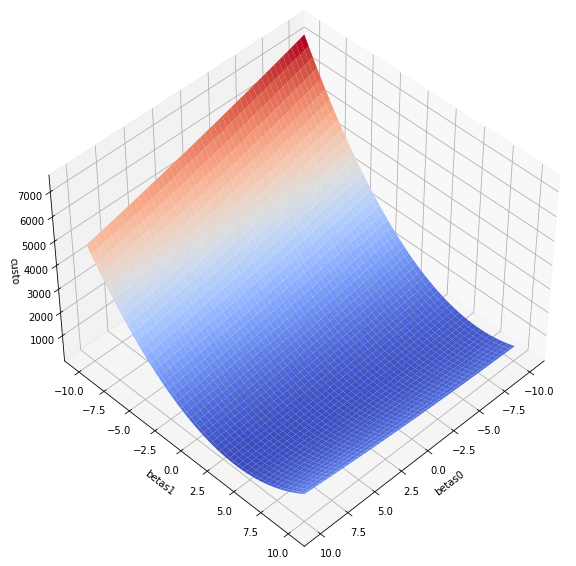

In [61]:
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
ax.view_init(45, 45)
ax.plot_surface(mat_betas0, mat_betas1, custos, cmap=cm.coolwarm)
ax.set_xlabel('betas0');
ax.set_ylabel('betas1');
ax.set_zlabel('custo');
# plt.axis('off')

In [62]:
X = amostra_padronizada

In [63]:
n_grade = 100
mat_betas0 = np.outer(np.linspace(-10.0, 10.0, n_grade), np.ones(n_grade))
mat_betas1 = np.outer(np.ones(n_grade), np.linspace(-10.0, 10.0, n_grade))
custos = EQM(X, [mat_betas0, mat_betas1])

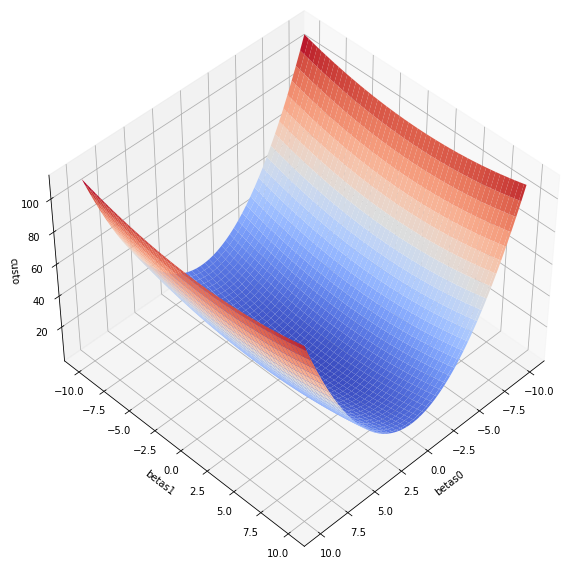

In [64]:
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
ax.view_init(45, 45)
ax.plot_surface(mat_betas0, mat_betas1, custos, cmap=cm.coolwarm)
ax.set_xlabel('betas0');
ax.set_ylabel('betas1');
ax.set_zlabel('custo');
#plt.axis('off')

<Axes3DSubplot:xlabel='betas0', ylabel='betas1'>

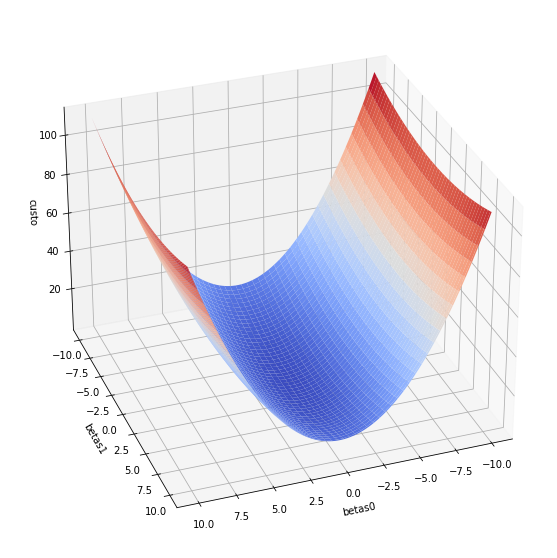

In [25]:
# Criando uma função
def matriz_de_custos(v1=15, v2=70, n_grade=100):
    mat_betas0 = np.outer(np.linspace(-10.0, 10.0, n_grade), np.ones(n_grade))
    mat_betas1 = np.outer(np.ones(n_grade), np.linspace(-10.0, 10.0, n_grade))
    custos = EQM(amostra_padronizada, [mat_betas0, mat_betas1])
    
    ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
    ax.view_init(v1, v2)
    ax.plot_surface(mat_betas0, mat_betas1, custos, cmap=cm.coolwarm)
    ax.set_xlabel('betas0');
    ax.set_ylabel('betas1');
    ax.set_zlabel('custo');
    return ax

matriz_de_custos(v1=30, v2=70)

Text(0, 0.5, 'b1')

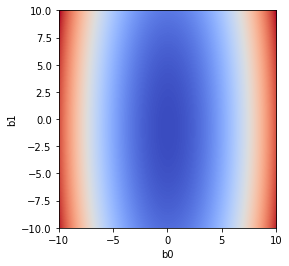

In [26]:
ax = plt.axes()
ax.imshow(custos.T, cmap=cm.coolwarm, extent=(-10,10,-10,10), interpolation='bilinear')
ax.set_xlabel('b0')
ax.set_ylabel('b1')

# O Gradiente Descendente

O Gradiente Descendente é um algoritmo de otimização iterativo para encontrar o ponto mínimo de uma função de custo.

$$
\beta_{0} = \beta_{0} - \alpha D_{\beta_{0}}
$$

$$
\beta_{1} = \beta_{1} - \alpha D_{\beta_{1}}
$$

em que:

$D_{\beta_{0}}$ refere-se à derivada parcial do intercepto

$D_{\beta_{1}}$ refere-se à derivada parcial do coeficiente de regressão

$\alpha$ refere-se à taxa de aprendizagem

## As derivadas parciais

$$
D_{\beta_{0}} = \frac{-2}{m} \sum_{i=1}^{m}(y_{i} - \hat{y_{i}})
$$

A implementação em Python é assim:

In [27]:
def Df_b0(X, betas):
    m, _ = dim(X)
    soma = sum([x[-1] - h(x, betas) for x in X])
    return -2 / m * soma

In [28]:
def Df_b0_v2(X, betas):
    m, _ = dim(X)
    soma = 0
    for x in X:
        y = x[-1]
        y_pred = h(x, betas)
        soma += y - y_pred
    return -2 / m * soma

In [29]:
betas = [0.0, 0.0]
Df_b0(X, betas)

4.4408920985006264e-17

$$
D_{\beta_{1}} = \frac{-2}{m} \sum_{i=1}^{m}x_{i}(y_{i} - \hat{y_{i}})
$$

In [30]:
def Df_b1(X, betas):
    m, _ = dim(X)
    soma = sum([x[1] * (x[-1] - h(x, betas)) for x in X])
    return -2 / m * soma

In [31]:
def Df_b1_v2(X, betas):
    m, n = dim(X)
    soma = 0
    for x in X:
        y = x[-1]
        y_pred = h(x, betas)
        soma += x[1] * (y - y_pred) 
    return -2 / m * soma

In [32]:
betas = [0.0, 0.0]
Df_b1_v2(X, betas)

-0.1697056274847714

**Exercício de fixação**

- Como as funções ```Df_b0``` e ```Df_b1``` podem ser implementadas utilizando ```numpy```?

## O Gradiente

$$
\nabla EQM() = [D_{\beta_{0}}, D_{\beta_{1}}]
$$

In [33]:
def gradiente(X, betas):
    df_db0 = Df_b0(X, betas)
    df_db1 = Df_b1(X, betas)
    return [df_db0, df_db1]

In [34]:
betas = [0.0, 0.0]
gradiente(X, betas)

[4.4408920985006264e-17, -0.1697056274847714]

**Exercício de fixação**

- Como devemos interpretar o gradiente obtido na função ```gradiente```?

## A descida do gradiente

In [35]:
tx_aprend = 0.08
#X = amostra_padronizada
X = amostra_padronizada

b0=10	b1=10	custo=108.40294372515227


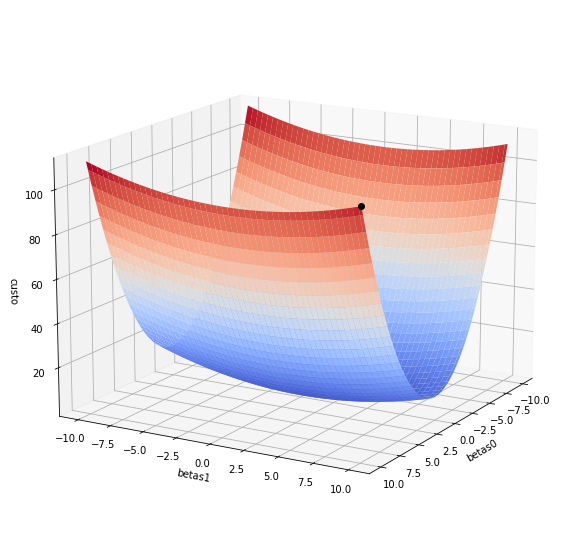

In [36]:
betas = [10, 10]
custo = EQM(X, betas)

print(f"b0={betas[0]}\tb1={betas[1]}\tcusto={custo}")
ax = matriz_de_custos(v1=15, v2=30)
ax.plot(betas[0], betas[1], custo, 'o', c='black', zorder=10)

In [37]:
def descer_gradiente(X, betas, alpha):
    betas[0] -= alpha * Df_b0(X, betas)
    betas[1] -= alpha * Df_b1(X, betas)
    return betas

Veja o que ocorre quando descemos o gradiente.

b0=8.4	b1=9.853576450198782	custo=78.69708951154105


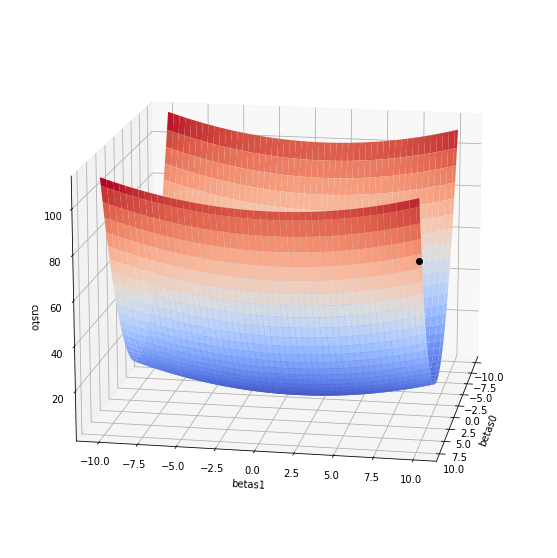

In [38]:
betas = [10, 10]
betas = descer_gradiente(X, betas, tx_aprend)

custo = EQM(X, betas)
print(f"b0={betas[0]}\tb1={betas[1]}\tcusto={custo}")

ax = matriz_de_custos(v1=15, v2=10)
ax.plot(betas[0], betas[1], custo, 'o', c='black', zorder=10)

Demonstração das mudanças nos coeficientes e no custo da função.

In [39]:
betas = [10, 10]
tx_aprend = 0.03

lst_pontos = []
for i in range(1000):
    lst_pontos.append((betas[0], betas[1], EQM(X, betas)))
    betas = descer_gradiente(X, betas, tx_aprend)

In [40]:
lst_pontos

[(10, 10, 108.40294372515227),
 (9.4, 9.945091168824543, 96.66274589842459),
 (8.836, 9.89051179063614, 86.27864283849581),
 (8.30584, 9.836259888716866, 77.09291030892004),
 (7.8074896, 9.782333498209107, 68.9661816765477),
 (7.339040224000001, 9.728730666044395, 61.775311104421824),
 (6.898697810560001, 9.675449450872673, 55.41148546880705),
 (6.484775941926401, 9.62248792299198, 49.778556048864104),
 (6.095689385410817, 9.569844164278571, 44.79156440743739),
 (5.729948022286168, 9.517516268117443, 40.37543985911179),
 (5.386151140948998, 9.465502339333282, 36.46384855278345),
 (5.0629820724920584, 9.413800494121826, 32.99817652081742),
 (4.759203148142535, 9.362408859981638, 29.92663110108391),
 (4.473650959253983, 9.311325575646292, 27.203446953272504),
 (4.205231901698744, 9.260548791016957, 24.788184494712517),
 (3.952917987596819, 9.210076667095398, 22.645109998071717),
 (3.7157429083410096, 9.159907375917369, 20.742647845492606),
 (3.492798333840549, 9.110039100486407, 19.05289

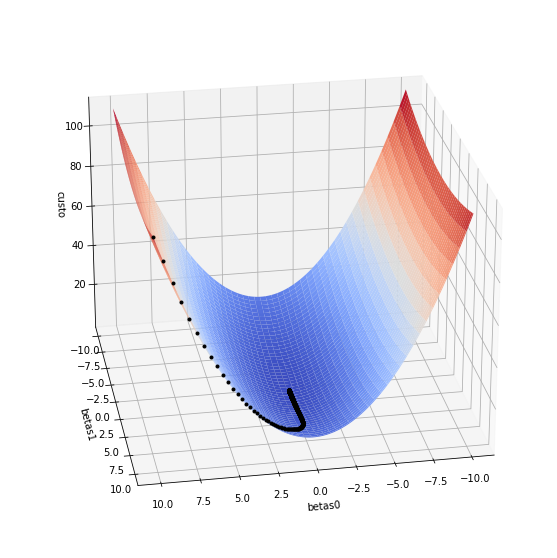

In [41]:
ax = matriz_de_custos(v1=25, v2=80)
for b0, b1, J in lst_pontos:
    ax.plot(b0, b1, J, '.', c='black', zorder=100)

**Exercício de fixação**

- O que é a lista de pontos no código acima?

- Explique com suas palavras o algoritmo do descendente gradiente.

## O algoritmo completo

In [42]:
def coef_iniciais(n):
    return [0.0 for _ in range(n)]
_, n = dim(amostra_padronizada) 
#Teste
n_betas = n-1
betas = coef_iniciais(n_betas)
betas

[0.0, 0.0]

In [43]:
def grad_desc_reg_lin(X, alpha, épocas):
    m, n = dim(X)
    # n-1: a última coluna da instância é a classe
    betas = coef_iniciais(n-1)
    for época in range(épocas):
        custo = EQM(X, betas)
        betas = descer_gradiente(X, betas, alpha)
        if (época % 10 == 0):
            print('>> época=%d, J=%.3f' % (época+1, custo))
    return betas

grad_desc_reg_lin(X, 0.1, 90)

>> época=1, J=0.100
>> época=11, J=0.076
>> época=21, J=0.060
>> época=31, J=0.049
>> época=41, J=0.042
>> época=51, J=0.038
>> época=61, J=0.034
>> época=71, J=0.032
>> época=81, J=0.031


[1.3322676295501881e-17, 0.7108030487894462]

**Exercícios de fixação**

- O que são épocas?

- Como desenhar uma reta de regressão utilizando Pandas?

# Projeto

Utilizando este material como referência, desenvolva um caderno Jupyter que explica passo-a-passo da regressão linear, com uma função de custo otimizada pelo algoritmo do gradiente descendente. O contexto de aplicação fica a critério do grupo, embora deva ser relacionado a NEGÓCIOS. Lembre-se que deve haver uma motivação (i.e., explicação convincente) da necessidade do caderno, antes do desenvolvimento. 

# Referências

https://medium.com/analytics-vidhya/understanding-linear-regression-in-depth-intuition-6c9f3b1cbb51